# Quantum classification trainability and Circuit structure

In [1]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

import sys
sys.path.append('..')

from src.circuit_structure_effect_on_trainability import *

In this notebook, we see the dependence of trainability of the QML classifier on the circuit structure and the cost function.

The circuit structure is defined by two parts: the embedding part, the ansatz part.
- embedding part: the embedding circuit to encode input data into the quantum circuit.  
    You can use 6 types of embedding circuits:
    - Tensor Product Embedding (TPE)
    - Alternating Layered Embedding (ALE)
    - Hardware Efficient Embedding (HEE)
    - Classically Hard Embedding (CHE)
    - Matrix Product State Embedding (MPS)
    - Amplitude Embedding (APE)
- ansatz part: the parametrized circuit to learn the training dataset.  
    You can use 3 types of ansatz circuits:
    - Tensor Product Ansatz (TPA): the ansatz circuit is the tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Ansatz (HEA): the ansatz circuit is the tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Strongly Entangling Ansatz (SEA): the ansatz circuit that is strongly entangled.

On `HEE` and `CHE`, refer to [`Subtleties in the trainability of quantum machine learning models`](https://arxiv.org/abs/2110.14753) for more details.

On `SEA`, refer to PennyLnae page: [embedding and ansatz](https://pennylane.readthedocs.io/en/stable/introduction/templates.html)

## Cost vs Circuit structure (use iris dataset with 2 features and 2 labels)

In [9]:
data = np.loadtxt("../data/iris_classes1and2_scaled.txt")
X = data[:,:4] # use first 2 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 4) (100,)
(80, 4) (80,)
(20, 4) (20,)


In [11]:
nqubits = X.shape[1]
embedding_nlayers = 1
ansatz_nlayers = 2
cost_type = "MSE"
embedding_list = ["TPE", "HEE", "CHE", "APE"]
ansatz_list = ["TPA", "HEA", "SEA"]
draw = False
shots = None
stepsize = 0.3
steps = 50

In [12]:
optimized_cost_acc_iris, cost_all_iris = train_each_circuit(
    x_train,
    y_train,
    x_test,
    y_test,
    nqubits,
    embedding_nlayers,
    ansatz_nlayers,
    embedding_list,
    ansatz_list,
    cost_type,
    draw,
    shots,
    stepsize,
    steps,
)

TPE, TPA
TPE, HEA
TPE, SEA
HEE, TPA
HEE, HEA
HEE, SEA
CHE, TPA
CHE, HEA
CHE, SEA
APE, TPA
APE, HEA
APE, SEA


In [13]:
circuit_structure_iris = optimized_cost_acc_iris, cost_all_iris

path = '../results/data/circuit_structure_iris.pkl'
with open(path, 'wb') as f:
    pickle.dump(circuit_structure_iris, f)

In [14]:
path = '../results/data/circuit_structure_iris.pkl'
with open(path, 'rb') as f:
    circuit_structure_iris = pickle.load(f)

optimized_cost_acc_iris, cost_all_iris = circuit_structure_iris

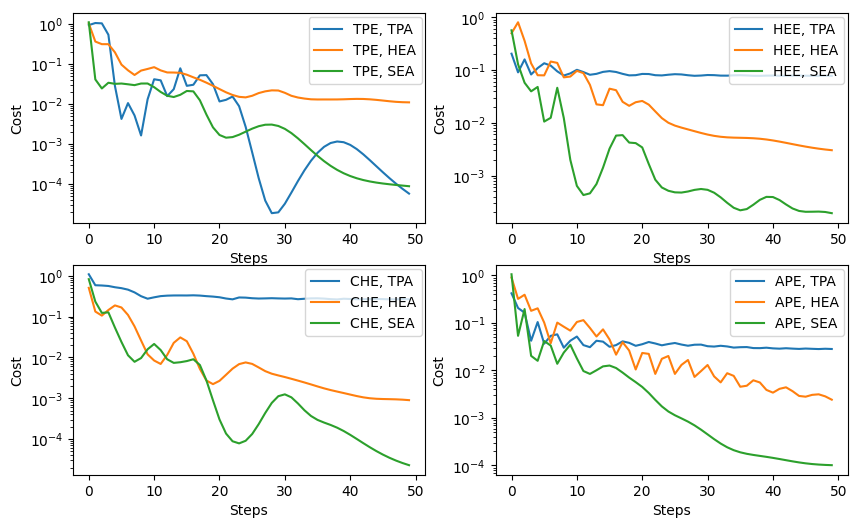

In [15]:
plot_cost(cost_all_iris)

In [16]:
sort_cost_acc(cost_type, optimized_cost_acc_iris)

MSE
embedding_type: CHE, ansatz_type: SEA: cost 2.2898083342249074e-05
embedding_type: TPE, ansatz_type: TPA: cost 5.746856761439014e-05
embedding_type: TPE, ansatz_type: SEA: cost 8.788946505997543e-05
embedding_type: APE, ansatz_type: SEA: cost 0.00010145406336803195
embedding_type: HEE, ansatz_type: SEA: cost 0.00019318043142322043
embedding_type: CHE, ansatz_type: HEA: cost 0.0008972956757125894
embedding_type: APE, ansatz_type: HEA: cost 0.0024276803958473404
embedding_type: HEE, ansatz_type: HEA: cost 0.003020589434305604
embedding_type: TPE, ansatz_type: HEA: cost 0.010929137993500499
embedding_type: APE, ansatz_type: TPA: cost 0.028352555554568337
embedding_type: HEE, ansatz_type: TPA: cost 0.0778509187368274
embedding_type: CHE, ansatz_type: TPA: cost 0.2662576612261428
---------------------------------------------------------------
embedding_type: TPE, ansatz_type: TPA: accuracy 1.0
embedding_type: TPE, ansatz_type: HEA: accuracy 1.0
embedding_type: TPE, ansatz_type: SEA: acc

## Cost vs the number of layers of embedding

In [9]:
data = np.loadtxt("../data/iris_classes1and2_scaled.txt")
X = data[:,:4]
Y = data[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
nqubits = 4
embedding_nlayers_list = [2, 4, 6, 8]
ansatz_nlayers = 2
embedding_type = "HEE"
ansatz_type = "HEA"
cost_type = "LOG"
draw = True
shots = None
stepsize = 0.3
steps = 100

In [10]:
# optimized_cost_list = []
# optimized_acc_list = []
# for embedding_nlayers in embedding_nlayers_list:
#     cost_embedding_layers = QuantumClassifier(
#         x_train,
#         y_train,
#         nqubits,
#         embedding_nlayers,
#         ansatz_nlayers,
#         embedding_type,
#         ansatz_type,
#         cost_type,
#         shots,
#         stepsize,
#         steps,
#     )
#     cost_embedding_layers.optimize()
#     optimized_cost_list.append(cost_embedding_layers.cost_list[-1])
#     optimized_acc_list.append(cost_embedding_layers.accuracy(x_test, y_test))

In [11]:
# cost_embedding = optimized_cost_list, optimized_acc_list

# path = '../results/data/cost_embedding.pkl'
# with open(path, 'wb') as f:
#     pickle.dump(cost_embedding, f)

In [6]:
path = '../results/data/cost_embedding.pkl'
with open(path, 'rb') as f:
    cost_embedding = pickle.load(f)

optimized_cost_list, optimized_acc_list = cost_embedding

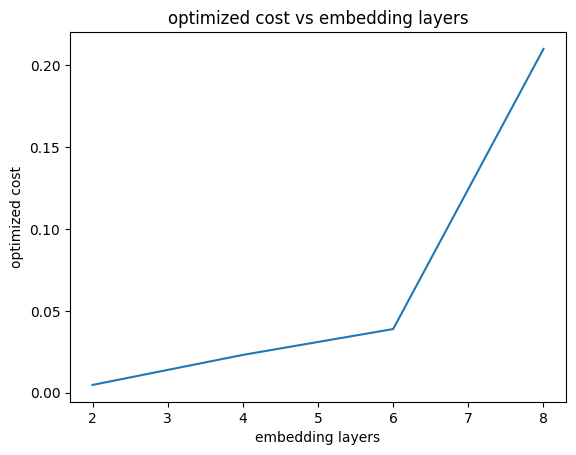

In [8]:
embedding_nlayers_list = [2, 4, 6, 8]

plt.plot(embedding_nlayers_list, optimized_cost_list)
plt.xlabel('embedding layers')
plt.ylabel('optimized cost')
plt.title('optimized cost vs embedding layers')
plt.show()

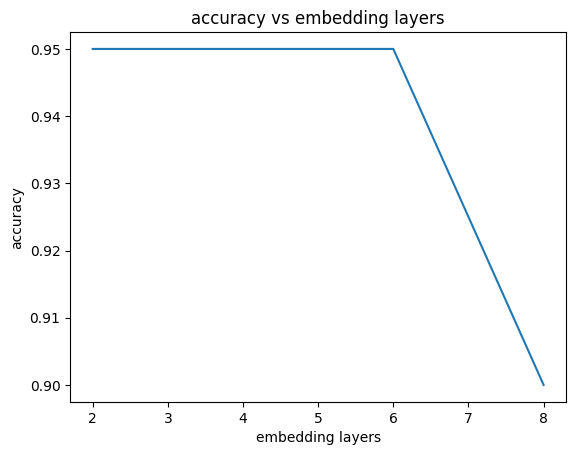

In [9]:
plt.plot(embedding_nlayers_list, optimized_acc_list)
plt.xlabel('embedding layers')
plt.ylabel('accuracy')
plt.title('accuracy vs embedding layers')
plt.show()

### -> many embedding layers make it harder to train the model